# **Neural Network Model for MNIST Dataset**

In this notebook, we will implement a neural network model to recognize different handwritten digits in the MNIST dataset


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
plt.style.use('seaborn')

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  1
Tensorflow version: 2.9.2
Keras version: 2.9.0


# Loading the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of labels

mnist_labels = ["0", 
             "1",
             "2",
             "3",
             "4",
             "5", 
             "6",
             "7",
             "8",
             "9"]

# Plotting some of the images

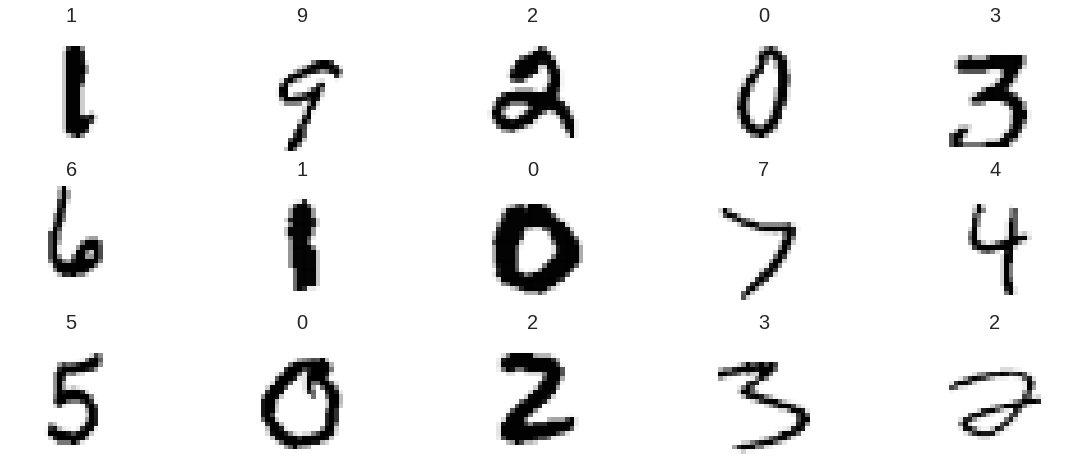

In [ ]:
figure = plt.figure(figsize=(20,8))

indices = np.random.choice(np.arange(x_train.shape[0]), 15, replace=False)
subset = x_train[indices]

for i, image_sample in enumerate(subset):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  j = mnist_labels[y_train[indices[i]]] #image label
  ax.set_title(j, fontsize=20)
  ax.imshow(image_sample.reshape(28,28))
  i+=1

# Count plot of the training set


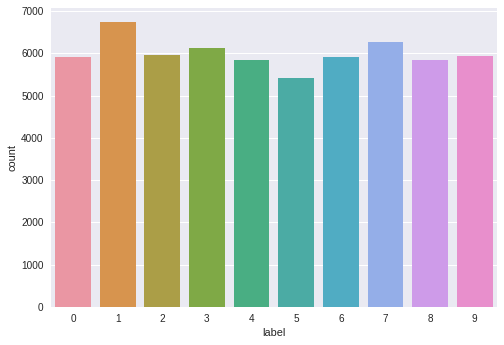

In [ ]:
y_train_pd = pd.DataFrame(y_train, columns=['label'])
sns.countplot(x='label', data=y_train_pd)

# Count plot of the testing set


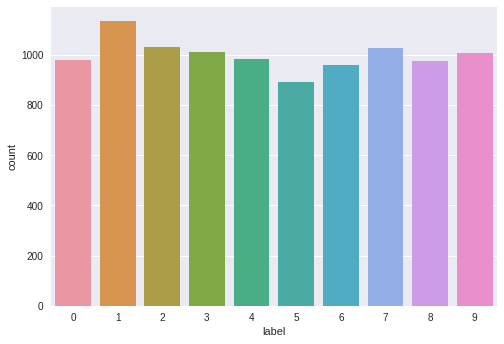

In [ ]:
y_test_pd = pd.DataFrame(y_test, columns=['label'])
sns.countplot(x='label', data=y_test_pd)

In [ ]:
#Type your code here

x_train = x_train / x_train.max()   #feature scaling (Hint:255 is the maximum pixel value)
x_test = x_test / x_test.max()

num_classes = len(mnist_labels) #no. of classes

train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes) #one hot encoding for the training set
test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)  #one hot encoding for the testing set

print(y_train[0])
print(train_one_hot[0])


train_size = x_train.shape[0]
test_size = x_test.shape[0]


print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Max pixel value: 1.0
Min pixel value: 0.0
Train size: 60000, Test size: 10000
Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Train label shape: (60000, 10), Test label shape: (10000, 10)


## Task: In this section, we are going to define our neural network model

Implement a neural network according to the below figure, it consists of:

1.   **an input layer**
> Shape = INPUT_SHAPE
2.   **a dense layer**
> No. of hidden units = 100, Activation = 'relu'
3.   **an output (dense) layer**
> Activation = 'softmax'


![](https://drive.google.com/uc?export=view&id=1k41hOCQY7QWB270IJ0VXo1cdMpZb6hmy)


**Links to the documentation for your reference:**

Input layer:
https://www.tensorflow.org/api_docs/python/tf/keras/Input

Dense layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense









# **Model training**

### Softmax function



At the output layer, the softmax function is used to normalize the output scores into probabilities:


$$p_i = softmax(x_i) = \frac{\exp({y_i})}{ \sum_{j=1}^n \exp({y_j})}$$

After applying the softmax function, the sum of the output probabilities will be 1:
 $$\sum_{i=1}^n p_i = 1$$




In [ ]:
#Type your code here

# Reshaping the data
INPUT_SHAPE = [28 * 28]  #input shape for one image

x_train = x_train.reshape([-1]+INPUT_SHAPE)
x_test = x_test.reshape([-1]+INPUT_SHAPE)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')

Train data shape: (60000, 784), Test data shape: (10000, 784)


In [ ]:

from tensorflow.keras.layers import *


tf.keras.backend.clear_session()

#Type your code here

#Define and compile your model
#=============================================

inputs = tf.keras.Input(shape=INPUT_SHAPE)

x = Dense(units=100,activation='relu')(inputs)

output = Dense(units=num_classes, activation='softmax')(x)


model = tf.keras.Model(
    inputs=inputs, outputs=output,
    name="dnn_mnist_model"
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.003,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer=optimizer,
    metrics=["accuracy"],
)


#=============================================
model.summary()

Model: "dnn_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


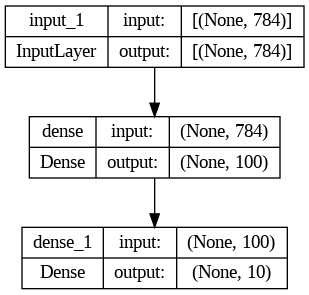

In [ ]:
tf.keras.utils.plot_model(model, "dnn_model.png", show_shapes=True)

## Defining callback functions and training the model

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

#Type your code here
batch_size = 128
epochs = 100

#Early Stopping callback function

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    mode = 'max',
    restore_best_weights = True
)






# Starting the training
history = model.fit(x_train, train_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.3, callbacks=[es]) #calling model.fit()




Epoch 1/100
329/329 [==============================] - 2s 6ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.1329 - val_accuracy: 0.9676
Epoch 2/100
329/329 [==============================] - 2s 5ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.1366 - val_accuracy: 0.9672
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.1281 - val_accuracy: 0.9694
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.1355 - val_accuracy: 0.9687
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.1298 - val_accuracy: 0.9706
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.1415 - val_accuracy: 0.9705
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.1573 - val_accuracy: 0.9681

# **Plotting the learning curves**

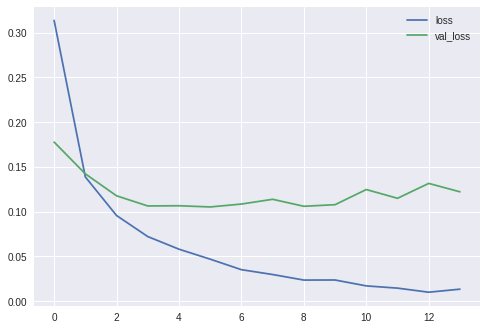

In [ ]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

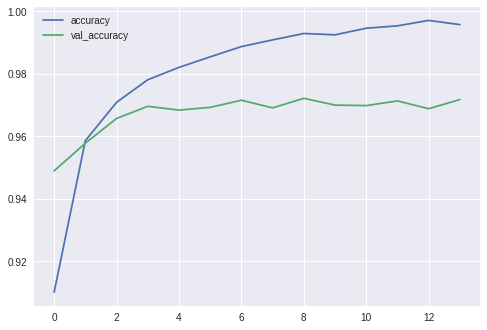

In [ ]:
res[['accuracy','val_accuracy']].plot()

# **Model evaluation on the testing set**

In [ ]:
#Type your code here

scores = model.evaluate(x_test, test_one_hot, verbose=1)   #calling model.evaluate()
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9757
loss: 0.0907
accuracy: 0.9757


In [ ]:
model.save("mnist.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("mnist.h5")
loaded_model.evaluate(x_test,test_one_hot,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9757


[0.09071759879589081, 0.9757000207901001]

# Making predictions and plotting the result

In [ ]:
#Type your code here

prediction = model.predict(x_test) #calling model.predict() here

one_hot = []
for item in test_one_hot:
    one_hot.append(np.where(item == 1))
one_hot = [value[0][0] for value in one_hot]

sum = np.sum(prediction, axis=1)
predict_index = np.argmax(prediction, axis=1)

print(
    f'sum: {sum}\n'
    f'predict index: {predict_index}\n'
    f'one_hot: {one_hot}'
)



313/313 [==============================] - 1s 1ms/step
sum: [1.         1.         0.99999994 ... 1.         1.         1.        ]
predict index: [7 2 1 ... 4 5 6]
one_hot: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 

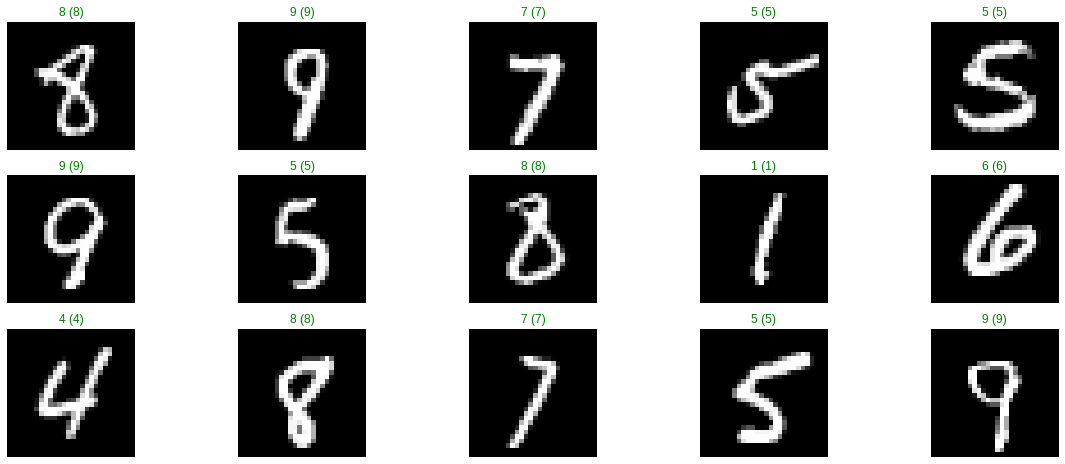

In [ ]:
figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(test_one_hot[index])
   
    ax.set_title("{} ({})".format(mnist_labels[predict_index], 
                mnist_labels[true_index]),
                color=("green" if predict_index == true_index else "red"))